# LABELING

In [21]:
import pandas as pd

# Membaca data dari file CSV dengan menyertakan parameter delimiter
df = pd.read_excel('/content/dataset.xlsx')

df

,Unnamed: 0,Title,Teks Berita,Label
0,0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,1
1,1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,1
2,2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,1
3,3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,1
4,4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,1
...,...,...,...,...
999,296,"Soal Langkah Politik Usai Gabung Golkar, Ridwa...",KOMPAS.com - Gubernur Jawa Barat Ridwan Kamil ...,0
1000,297,Elite Politik Selandia Baru Yakin PM Ardern Mu...,"WELLINGTON, KOMPAS.com - Perdana Menteri Selan...",0
1001,298,"Anut Politik Tahu Diri, Ridwan Kamil Dinilai T...",Ketua DPD Partai Golkar Jawa Barat Ace Hasan S...,0
1002,299,KPU Akui Politik Uang Jadi PR untuk Pemilu 202...,"JAKARTA, KOMPAS.com ï¿½ Komisi Pemilihan Umum ...",0


In [22]:
data = df.drop(columns=['Unnamed: 0', 'Teks Berita'])
data

,Title,Label
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,1
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,1
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,1
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,1
...,...,...
999,"Soal Langkah Politik Usai Gabung Golkar, Ridwa...",0
1000,Elite Politik Selandia Baru Yakin PM Ardern Mu...,0
1001,"Anut Politik Tahu Diri, Ridwan Kamil Dinilai T...",0
1002,KPU Akui Politik Uang Jadi PR untuk Pemilu 202...,0


In [ ]:
data = data.drop_duplicates(subset=['Title'])
data['Title'] = data['Title'].str.replace('\[SALAH\]', '')
data

<ipython-input-3-eb0b4c196a57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Title'] = data['Title'].str.replace('\[SALAH\]', '')


,Title,Label
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,1
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,1
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,1
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,1
...,...,...
999,"Soal Langkah Politik Usai Gabung Golkar, Ridwa...",0
1000,Elite Politik Selandia Baru Yakin PM Ardern Mu...,0
1001,"Anut Politik Tahu Diri, Ridwan Kamil Dinilai T...",0
1002,KPU Akui Politik Uang Jadi PR untuk Pemilu 202...,0


# Sentiment Analysis Using Naive Bayes

## Preprocessing

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle
import re
import seaborn as sn

%matplotlib inline

In [24]:
!pip -q install sastrawi

In [25]:
data["Label"].value_counts()

,count
Label,
1,703
0,301


### Casefolding

In [26]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
    # Check if text is a string
    if not isinstance(text, str):
        return ""  # Return an empty string or some other placeholder for non-string inputs
    text = re.sub(r'\n', ' ', text)                      # Menghilangkan Enter
    text = text.lower()                                  # Mengubah huruf menjadi huruf kecil
    text = text.replace("[SALAH]", " ")                  # Hapus [SALAH]
    text = text.replace(":", " ")                        # Hapus :
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)   # Menghapus URL
    text = re.sub(r'[-+]?[0-9]+', ' ', text)             # Menghapus angka
    text = re.sub(r'[^\w\s*]',' ', text)                 # Menghapus karakter tanda baca
    text = text.strip()                                  # Menghapus whitespace di awal dan di akhir
    return text

data["casefolding"] = data["Title"].apply(lambda x: casefolding(x))
data.head(15)

,Title,Label,casefolding
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,1,salah anies baswedan dekat dengan aliran krsi...
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,1,salah hakim wahyu iman santoso alami kecelaka...
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1,salah gambar megawati dan puan bermain slot
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,1,salah jonathan latumahina seorang nasrani dan...
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,1,salah pesan whatsapp dari bmkg yang kabarkan ...
5,[SALAH] PDI-P Diblacklist dari Peserta Pilpres...,1,salah pdi p diblacklist dari peserta pilpres ...
6,[SALAH] Ari Lasso Meninggal Dunia Akibat Mengi...,1,salah ari lasso meninggal dunia akibat mengid...
7,[SALAH] Richard Eliezer Hadiri Pemakaman Ferdy...,1,salah richard eliezer hadiri pemakaman ferdy ...
8,[SALAH] Foto Presiden Joe Biden dan Volodymyr ...,1,salah foto presiden joe biden dan volodymyr z...
9,[SALAH] Video Salju Turun Pertama Kali Dalam 1...,1,salah video salju turun pertama kali dalam ...


In [27]:
def tokenize(text):
    tokens = text.split()
    return tokens

data["tokenization"] = data["casefolding"].apply(lambda x: tokenize(x))
data.head(15)

,Title,Label,casefolding,tokenization
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,1,salah anies baswedan dekat dengan aliran krsi...,"[salah, anies, baswedan, dekat, dengan, aliran..."
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,1,salah hakim wahyu iman santoso alami kecelaka...,"[salah, hakim, wahyu, iman, santoso, alami, ke..."
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1,salah gambar megawati dan puan bermain slot,"[salah, gambar, megawati, dan, puan, bermain, ..."
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,1,salah jonathan latumahina seorang nasrani dan...,"[salah, jonathan, latumahina, seorang, nasrani..."
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,1,salah pesan whatsapp dari bmkg yang kabarkan ...,"[salah, pesan, whatsapp, dari, bmkg, yang, kab..."
5,[SALAH] PDI-P Diblacklist dari Peserta Pilpres...,1,salah pdi p diblacklist dari peserta pilpres ...,"[salah, pdi, p, diblacklist, dari, peserta, pi..."
6,[SALAH] Ari Lasso Meninggal Dunia Akibat Mengi...,1,salah ari lasso meninggal dunia akibat mengid...,"[salah, ari, lasso, meninggal, dunia, akibat, ..."
7,[SALAH] Richard Eliezer Hadiri Pemakaman Ferdy...,1,salah richard eliezer hadiri pemakaman ferdy ...,"[salah, richard, eliezer, hadiri, pemakaman, f..."
8,[SALAH] Foto Presiden Joe Biden dan Volodymyr ...,1,salah foto presiden joe biden dan volodymyr z...,"[salah, foto, presiden, joe, biden, dan, volod..."
9,[SALAH] Video Salju Turun Pertama Kali Dalam 1...,1,salah video salju turun pertama kali dalam ...,"[salah, video, salju, turun, pertama, kali, da..."


### Normalisasi kata

normalisasi kata, datanya dapat di download disini
https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

In [28]:
key_norm = pd.read_csv("/content/key_norm.csv")
def text_normalize(text):
    text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
    text = str.lower(text)
    return text
data['textnormalize'] = data['casefolding'].apply(text_normalize)
data.head()


,Title,Label,casefolding,tokenization,textnormalize
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,1,salah anies baswedan dekat dengan aliran krsi...,"[salah, anies, baswedan, dekat, dengan, aliran...",salah anies baswedan dekat dengan aliran krsit...
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,1,salah hakim wahyu iman santoso alami kecelaka...,"[salah, hakim, wahyu, iman, santoso, alami, ke...",salah hakim wahyu iman santoso alami kecelakaa...
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1,salah gambar megawati dan puan bermain slot,"[salah, gambar, megawati, dan, puan, bermain, ...",salah gambar megawati dan puan bermain slot
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,1,salah jonathan latumahina seorang nasrani dan...,"[salah, jonathan, latumahina, seorang, nasrani...",salah jonathan latumahina seorang nasrani dan ...
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,1,salah pesan whatsapp dari bmkg yang kabarkan ...,"[salah, pesan, whatsapp, dari, bmkg, yang, kab...",salah pesan whatsapp dari bmkg yang kabarkan g...


### Stopwords Removal

In [29]:
# download Stopwords bahasa indonesia
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords


stopwords_ind = stopwords.words('indonesian')
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [31]:
def remove_stop_words(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)
data['stopwordremoval'] = data['textnormalize'].apply(remove_stop_words)
data.head()

,Title,Label,casefolding,tokenization,textnormalize,stopwordremoval
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,1,salah anies baswedan dekat dengan aliran krsi...,"[salah, anies, baswedan, dekat, dengan, aliran...",salah anies baswedan dekat dengan aliran krsit...,salah anies baswedan aliran krsiten sesat alph...
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,1,salah hakim wahyu iman santoso alami kecelaka...,"[salah, hakim, wahyu, iman, santoso, alami, ke...",salah hakim wahyu iman santoso alami kecelakaa...,salah hakim wahyu iman santoso alami kecelakaa...
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1,salah gambar megawati dan puan bermain slot,"[salah, gambar, megawati, dan, puan, bermain, ...",salah gambar megawati dan puan bermain slot,salah gambar megawati puan bermain slot
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,1,salah jonathan latumahina seorang nasrani dan...,"[salah, jonathan, latumahina, seorang, nasrani...",salah jonathan latumahina seorang nasrani dan ...,salah jonathan latumahina nasrani penyusup orm...
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,1,salah pesan whatsapp dari bmkg yang kabarkan ...,"[salah, pesan, whatsapp, dari, bmkg, yang, kab...",salah pesan whatsapp dari bmkg yang kabarkan g...,salah pesan whatsapp bmkg kabarkan gunung sina...


### Stemming

stemmming adalah menghilangkan kata depan dan kata belakang contohnya

Menghidupkan -> hidup

Module yang digunakan untuk bahasa indonesia adalah Sastrawi

In [32]:
!pip install Sastrawi

In [33]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text
data['stemming'] = data['stopwordremoval'].apply(stemming)
data.head()

,Title,Label,casefolding,tokenization,textnormalize,stopwordremoval,stemming
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,1,salah anies baswedan dekat dengan aliran krsi...,"[salah, anies, baswedan, dekat, dengan, aliran...",salah anies baswedan dekat dengan aliran krsit...,salah anies baswedan aliran krsiten sesat alph...,salah anies baswedan alir krsiten sesat alpha ...
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,1,salah hakim wahyu iman santoso alami kecelaka...,"[salah, hakim, wahyu, iman, santoso, alami, ke...",salah hakim wahyu iman santoso alami kecelakaa...,salah hakim wahyu iman santoso alami kecelakaa...,salah hakim wahyu iman santoso alami celaka tu...
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1,salah gambar megawati dan puan bermain slot,"[salah, gambar, megawati, dan, puan, bermain, ...",salah gambar megawati dan puan bermain slot,salah gambar megawati puan bermain slot,salah gambar megawati puan main slot
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,1,salah jonathan latumahina seorang nasrani dan...,"[salah, jonathan, latumahina, seorang, nasrani...",salah jonathan latumahina seorang nasrani dan ...,salah jonathan latumahina nasrani penyusup orm...,salah jonathan latumahina nasrani susup ormas ...
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,1,salah pesan whatsapp dari bmkg yang kabarkan ...,"[salah, pesan, whatsapp, dari, bmkg, yang, kab...",salah pesan whatsapp dari bmkg yang kabarkan g...,salah pesan whatsapp bmkg kabarkan gunung sina...,salah pesan whatsapp bmkg kabar gunung sabung ...


In [34]:
data["clean_text"] = data['stemming']
data.drop(["casefolding","textnormalize","stopwordremoval","stemming"],axis=1,inplace=True)
data.head()

,Title,Label,tokenization,clean_text
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,1,"[salah, anies, baswedan, dekat, dengan, aliran...",salah anies baswedan alir krsiten sesat alpha ...
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,1,"[salah, hakim, wahyu, iman, santoso, alami, ke...",salah hakim wahyu iman santoso alami celaka tu...
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1,"[salah, gambar, megawati, dan, puan, bermain, ...",salah gambar megawati puan main slot
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,1,"[salah, jonathan, latumahina, seorang, nasrani...",salah jonathan latumahina nasrani susup ormas ...
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,1,"[salah, pesan, whatsapp, dari, bmkg, yang, kab...",salah pesan whatsapp bmkg kabar gunung sabung ...


### Hapus clean text yang kosong

In [35]:
data = data[data["clean_text"]!=""]
data

,Title,Label,tokenization,clean_text
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,1,"[salah, anies, baswedan, dekat, dengan, aliran...",salah anies baswedan alir krsiten sesat alpha ...
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,1,"[salah, hakim, wahyu, iman, santoso, alami, ke...",salah hakim wahyu iman santoso alami celaka tu...
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,1,"[salah, gambar, megawati, dan, puan, bermain, ...",salah gambar megawati puan main slot
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,1,"[salah, jonathan, latumahina, seorang, nasrani...",salah jonathan latumahina nasrani susup ormas ...
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,1,"[salah, pesan, whatsapp, dari, bmkg, yang, kab...",salah pesan whatsapp bmkg kabar gunung sabung ...
...,...,...,...,...
999,"Soal Langkah Politik Usai Gabung Golkar, Ridwa...",0,"[soal, langkah, politik, usai, gabung, golkar,...",langkah politik gabung golkar ridwan kamil jaw...
1000,Elite Politik Selandia Baru Yakin PM Ardern Mu...,0,"[elite, politik, selandia, baru, yakin, pm, ar...",elite politik selandia pm ardern mundur ancam ...
1001,"Anut Politik Tahu Diri, Ridwan Kamil Dinilai T...",0,"[anut, politik, tahu, diri, ridwan, kamil, din...",anut politik ridwan kamil nilai maju cawapres
1002,KPU Akui Politik Uang Jadi PR untuk Pemilu 202...,0,"[kpu, akui, politik, uang, jadi, pr, untuk, pe...",kpu aku politik uang pr milu ungkit fenomena k...


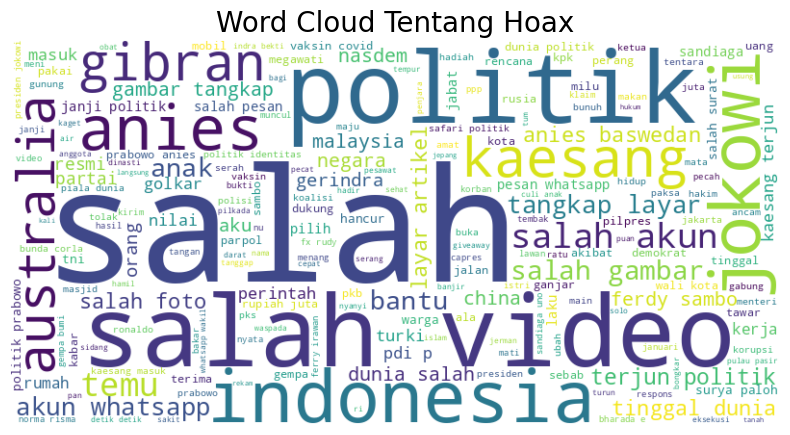

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(data['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Tentang Hoax', fontsize=20)  # Memberikan label 'Word Cloud Tentang Hoax'
plt.show()


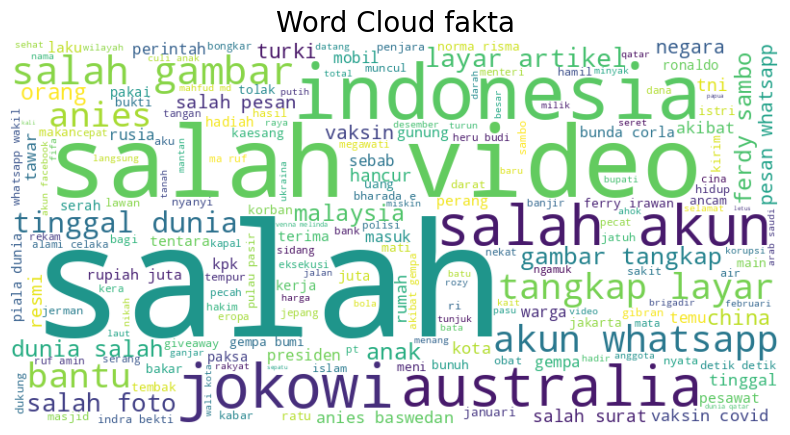

In [37]:
fakta = data[data['Label'] == 1]

# Menggabungkan teks dari data yang sudah difilter
all_text = ' '.join(fakta['clean_text'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud fakta', fontsize=20)
plt.show()

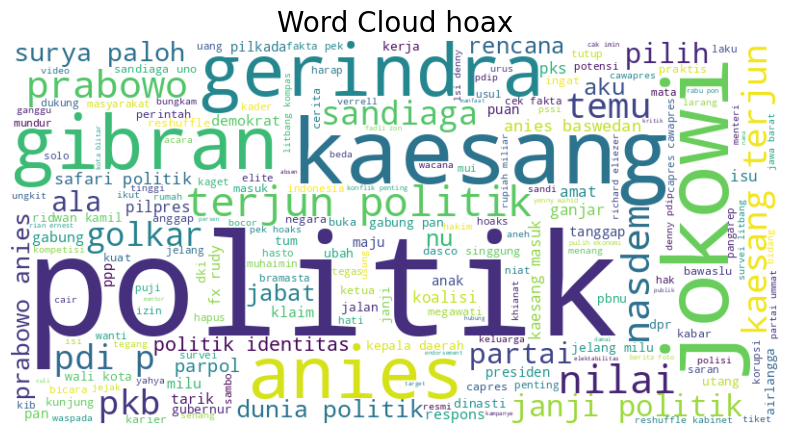

In [38]:
hoax = data[data['Label'] == 0]

# Menggabungkan teks dari data yang sudah difilter
all_text = ' '.join(hoax['clean_text'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud hoax', fontsize=20)
plt.show()

In [39]:
data.to_excel('dataset_clean.xlsx')

## Splitting the data

In [40]:
from sklearn.model_selection import train_test_split

X_raw = data["clean_text"]
y_raw = data["Label"]
X_train, X_test, y_train, y_test = train_test_split(X_raw.values, y_raw.values, test_size=0.4, random_state=42)

## TF-IDF

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer.fit(X_train)

TfidfVectorizer(ngram_range=(1, 2))

In [42]:
X_train_TFIDF = vectorizer.transform(X_train).toarray()
X_test_TFIDF = vectorizer.transform(X_test).toarray()
X = vectorizer.transform(data["clean_text"]).toarray()
kolom = vectorizer.get_feature_names_out()
train_tf_idf = pd.DataFrame(X_train_TFIDF, columns=kolom)
test_tf_idf = pd.DataFrame(X_test_TFIDF, columns=kolom)
train_tf_idf.head()

,abad,abad nu,abbas,abbas nikita,abdul,abdul somad,abrik,abrik militer,absen,absen nama,...,ziarah,ziarah makam,zidan,zidan layat,zon,zon buka,zon sumfi,zulhas,zulkifli,zulkifli hasan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=500)
X_kbest_features = chi2_features.fit_transform(train_tf_idf, y_train)

print('Banyaknya fitur awal:', train_tf_idf.shape[1])
print('banyaknya fitur setelah di seleksi:', X_kbest_features.shape[1])


Banyaknya fitur awal: 5338
banyaknya fitur setelah di seleksi: 500


In [44]:
X_kbest_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_kbest_features,y_train)

GaussianNB()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.80      0.87      0.83       113
           1       0.95      0.91      0.93       289

    accuracy                           0.90       402
   macro avg       0.87      0.89      0.88       402
weighted avg       0.90      0.90      0.90       402



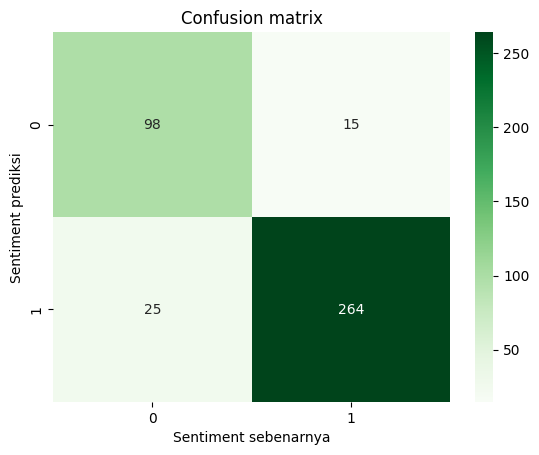

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

X_test_chi2 = chi2_features.transform(X_test_TFIDF)
y_pred = NB.predict(X_test_chi2)
print(classification_report(y_test, y_pred))

columns = ['0', '1']
confm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Greens', annot=True, fmt=".0f")
ax.set_title('Confusion matrix')
ax.set_xlabel('Sentiment sebenarnya')
ax.set_ylabel('Sentiment prediksi')

# Pindahkan label pada sumbu x (sentimen prediksi) ke kanan
# wighted avg bobot pada setiap kelas
# ax.invert_xaxis()

plt.show()